In [1]:
""""
functionnal connectivity channel to channel 
"""

'"\nfunctionnal connectivity channel to channel \n'

In [2]:
import lib.cnn.matnpyio as io
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
import collections
import pandas as pd

In [6]:
import re

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
result_path =  '/home/rudy/Python2/regression_linear/result2/' 

In [9]:
file_names = os.listdir(result_path)

In [10]:
file_names

['result_sess_no_141017channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150126channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150304channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150305channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150217channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150427channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_141126channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_141208channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150210channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_141216channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_141212channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_141125channel_to_channel_all_interval_with_error_bar.csv',
 'result_sess_no_150504channel_to_channel_all_interval_with_error_bar.csv',
 'result_ses

In [11]:
session = []
for txt in file_names :
    session.append(re.findall('\d+', txt)[0])


In [12]:
len(session)

62

In [ ]:
session

In [ ]:
# path to raw data (for rinfo_path => get area_names)
base_path = '/media/rudy/disk2/lucy/'
dico_area_to_cortex = io.get_dico_area_to_cortex()

for sess_no in session :
    print(sess_no)
    
    # recording info path
    rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'
    # file path
    file_name = '/home/rudy/Python2/regression_linear/result2/' + 'result_sess_no_'+sess_no+'channel_to_channel_all_interval_with_error_bar.csv'
       
    # load csv file 
    df = pd.read_csv(file_name)
    
    # select data
    only_correct_trials = True

    lowcut1, highcut1, order1 = 7, 12, 3
    lowcut2, highcut2, order2 = 7, 12, 3

    window_size1 = 200
    window_size2 = window_size1 #window_size1 ### 0.72
    step = 100
    delay = 0

    str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
    str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)
    
    df_cortex = df[(df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]
    
    # select channels
    
    target_cortex1 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']
    target_cortex2 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']

    target_areas1 = []
    for cortex1 in target_cortex1 :
        for area in io.get_area_cortex(rinfo_path, cortex1, unique = False):
            target_areas1.append(area)
    target_areas2 = []
    for cortex2 in target_cortex2 :
        for area in io.get_area_cortex(rinfo_path, cortex2, unique = False):
            target_areas2.append(area)

    target1 = collections.Counter(target_areas1)
    target2 = collections.Counter(target_areas2)

    label1 = []
    for area1 in target1 :
        for count1 in range(target1[area1]):
            label1.append(area1)

    label2 = []
    for area2 in target2 :
        for count2 in range(target2[area2]):
            label2.append(area2)
            
    # easier to select idx with numpy array            
    label1 = np.array(label1)
    label2 = np.array(label2)
    
    # print something 

#     print(label1)
#     print(label2)

#     print(len(label1))
#     print(len(label2))
    print('from ', lowcut1,'-',highcut1, ' to ',  lowcut2,'-',highcut2, 'Hz')

    # build matrix with all channels
    FC = np.zeros( (len(label1), len(label2)))

    i=0
    for area1 in target1 :
        for count1 in range(target1[area1]):
            j=0
            for area2 in target2 :
                for count2 in range(target2[area2]):

                    r = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_test'].values
                    if len(r) > 0 :
                        #print(i,j)
                        FC[i,j] = r[0]

                    else :
                        print(area1, area2)


                    j+=1
            i+=1
            
    # show matrix 
    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(FC, vmin=0)#, vmax=1.0)# cmap='jet')
    fig.colorbar(im)


    # We want to show all ticks...
    ax.set_xticks(np.arange(len(label2)))
    ax.set_yticks(np.arange(len(label1)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(label2, linespacing=5)
    ax.set_yticklabels(label1, linespacing=5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # for i in range(len(label1)):
    #     for j in range(len(label2)):


    #         if round(FC[i, j],3) < 0.8* FC.max() :

    #             text = ax.text(j, i, round(FC[i, j],1),
    #                            ha="center", va="center", color="w")
    #         else:
    #             text = ax.text(j, i, round(FC[i, j],1),
    #                            ha="center", va="center", color="b")


    ax.set_title("R_squared")
    #fig.tight_layout()
    
    # save matrix and labels as numpy file (make directory if not exists)
    directory = '/home/rudy/Python2/regression_linear/figure/'+sess_no+'/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    np.save(directory +'channel_to_channel_all_cortex_low_'+str(lowcut1)+'_high_'+str(highcut1)+'.npy', FC )
    np.save(directory +'label1.npy', label1 )
    np.save(directory +'label2.npy', label2 )

    # save plot as jpg file
    plt.savefig(directory+'channel_to_channel_all_channel_low_'+str(lowcut1)+'_high_'+str(highcut1)+'.jpg')
    plt.show()
    
    
    # get cortex of each channel
    label1_cortex = []
    for area in label1 :
        label1_cortex.append(dico_area_to_cortex[area])

    label2_cortex = []
    for area in label2 :
        label2_cortex.append(dico_area_to_cortex[area])

    label1_cortex = np.array(label1_cortex)
    label2_cortex = np.array(label2_cortex)
#     label1 = np.array(label1)
#     label2 = np.array(label2)
    
    # plot matrix cortex by cortex + save it
    # only plot r2 score if r2 > threshold : there is a link between the input and the output
    threshold = df_cortex['r2_error_bar_test'].max()
    for cortex1 in ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']: 
        ind1 = (label1_cortex ==cortex1)
        for cortex2 in ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory'] :
            print(cortex1, ' to ', cortex2)
            ind2 = (label2_cortex==cortex2)
            
            # select cortex
            label1_bis = label1[ind1]
            label2_bis = label2[ind2]
            if len(label1_bis) ==0 or len(label2_bis)==0:
                continue

            FC_cortex1_to_cortex2 = FC[ind1, :][:,ind2]
            
            # save matrix and make directory if not exists            
            if not os.path.exists(directory+cortex1+'_to_'+cortex2+'/'):
                os.makedirs(directory+cortex1+'_to_'+cortex2+'/')
            np.save(directory + cortex1+'_to_'+cortex2+'/channel_to_channel_'+cortex1+'_to_'+cortex2+'__low_'+str(lowcut1)+'_high_'+str(highcut1)+'.npy', FC_cortex1_to_cortex2 )
            np.save(directory + cortex1+'_to_'+cortex2+'/label1.npy', label1_bis)
            np.save(directory + cortex1+'_to_'+cortex2+'/label2.npy', label2_bis)
            


            fig, ax = plt.subplots(figsize=(15,15))
            #fig, ax = plt.subplots()
            im = ax.imshow(FC_cortex1_to_cortex2, vmin=0)#, vmax=1.0)# cmap='jet')
            # make the size of the colorbar the same as the picture 
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.10)
            fig.colorbar(im, cax=cax)


            # We want to show all ticks...
            ax.set_xticks(np.arange(len(label2_bis)))
            ax.set_yticks(np.arange(len(label1_bis)))
            # ... and label them with the respective list entries
            ax.set_xticklabels(label2_bis)
            ax.set_yticklabels(label1_bis)

            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")

            #Loop over data dimensions and create text annotations.
            for i in range(len(label1_bis)):
                for j in range(len(label2_bis)):
                     if FC_cortex1_to_cortex2[i, j] > threshold :
                        # plot round number 
                        # and with black or white according to the color of the pixel

                        if round(FC_cortex1_to_cortex2[i, j],3) < 0.8* FC_cortex1_to_cortex2.max() :

                            text = ax.text(j, i, round(FC_cortex1_to_cortex2[i, j],1),
                                           ha="center", va="center", color="w")
                        else:
                            text = ax.text(j, i, round(FC_cortex1_to_cortex2[i, j],1),
                                           ha="center", va="center", color="b")


            ax.set_title("R_squared")
            #fig.tight_layout()
            
            # save figure
            plt.savefig(directory + cortex1+'_to_'+cortex2+'/channel_to_channel_'+ cortex1+'_to_'+cortex2+'_low_'+str(lowcut1)+'_high_'+str(highcut1)+'.jpg' )
            plt.show()
    

    
    

In [ ]:
### save matrix with time course

In [13]:
# path to raw data (for rinfo_path => get area_names)
base_path = '/media/rudy/disk2/lucy/'
dico_area_to_cortex = io.get_dico_area_to_cortex()

In [14]:
#for sess_no in session :
sess_no = session[0]
print(sess_no)

# recording info path
rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'
# file path
file_name = '/home/rudy/Python2/regression_linear/result2/' + 'result_sess_no_'+sess_no+'channel_to_channel_all_interval_with_error_bar.csv'

# load csv file 
df = pd.read_csv(file_name)

# select data
only_correct_trials = True

lowcut1, highcut1, order1 = 7, 12, 3
lowcut2, highcut2, order2 = 7, 12, 3

window_size1 = 200
window_size2 = window_size1 #window_size1 ### 0.72
step = 100
delay = 0

str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)

df_cortex = df[(df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]

# select 

141017


In [15]:
df_cortex.keys()

Index(['session', 'area1', 'num1', 'area2', 'num2', 'cortex1', 'cortex2',
       'str_freq1', 'str_freq2', 'window_size1', 'window_size2', 'step',
       'delay', 'len(ind_test)', 'len(ind_train)', 'n_chans1', 'n_chans2',
       'only_correct_trials', 'r2_train', 'r2_test', 'r2_train_time',
       'r2_test_time', 'r2_error_bar_test', 'r2_error_bar_test_time',
       'step_list', 'renorm', 'seed'],
      dtype='object')

In [16]:
r2_test_time = eval(df['r2_test_time'].values[0])

In [17]:
error_bar = eval(df['r2_error_bar_test_time'].values[0])

In [18]:
len(error_bar)

43

In [19]:
#step_list = df['step_list'].unique()
step_list = eval( df['step_list'].values[0] )

In [20]:
step_list[18]

for i in range(18, len(step_list)):
    step_list[i] = step_list[i] + 200

In [21]:
len(step_list)

43

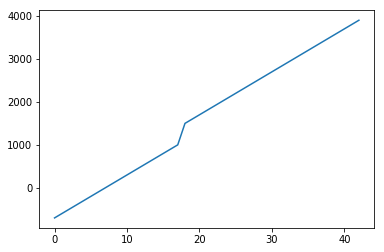

In [22]:
plt.plot(step_list)

In [36]:
# path to raw data (for rinfo_path => get area_names)
base_path = '/media/rudy/disk2/lucy/'
dico_area_to_cortex = io.get_dico_area_to_cortex()

for sess_no in session :
#sess_no = session[0]
    print(sess_no)

    # recording info path
    rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'
    # file path
    file_name = '/home/rudy/Python2/regression_linear/result2/' + 'result_sess_no_'+sess_no+'channel_to_channel_all_interval_with_error_bar.csv'

    # load csv file 
    df = pd.read_csv(file_name)

    # select data
    only_correct_trials = True

    lowcut1, highcut1, order1 = 7, 12, 3
    lowcut2, highcut2, order2 = 7, 12, 3

    window_size1 = 200
    window_size2 = window_size1 #window_size1 ### 0.72
    step = 100
    delay = 0

    str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
    str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)

    df_cortex = df[(df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]

    step_list = eval( df['step_list'].values[0] )
    # number of time step (always the same)
    n_time = len(step_list)
    # correct a mistake => match onset = 2000 (and sample onset = 0)
    for i in range(18, len(step_list)):
        step_list[i] = step_list[i] + 200


    # select channels

    target_cortex1 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']
    target_cortex2 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']

    target_areas1 = []
    for cortex1 in target_cortex1 :
        for area in io.get_area_cortex(rinfo_path, cortex1, unique = False):
            target_areas1.append(area)
    target_areas2 = []
    for cortex2 in target_cortex2 :
        for area in io.get_area_cortex(rinfo_path, cortex2, unique = False):
            target_areas2.append(area)

    target1 = collections.Counter(target_areas1)
    target2 = collections.Counter(target_areas2)

    label1 = []
    for area1 in target1 :
        for count1 in range(target1[area1]):
            label1.append(area1)

    label2 = []
    for area2 in target2 :
        for count2 in range(target2[area2]):
            label2.append(area2)

    # easier to select idx with numpy array            
    label1 = np.array(label1)
    label2 = np.array(label2)

    # print something 

    #     print(label1)
    #     print(label2)

    #     print(len(label1))
    #     print(len(label2))

    # build matrix with all channels
    FC = np.zeros( (len(label1), len(label2), n_time))
    FC_error_bar = np.zeros( (len(label1), len(label2), n_time))

    i=0
    for area1 in target1 :
        for count1 in range(target1[area1]):
            j=0
            for area2 in target2 :
                for count2 in range(target2[area2]):
                    r2_test_time = eval(df['r2_test_time'].values[0])

                    r2_test_time = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_test_time'].values
                    r2_error_bar_test_time = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_error_bar_test_time'].values
                    if len(r2_test_time) > 0 :
                        #print(i,j)
                        r2_test_time = eval(r2_test_time[0])
                        r2_error_bar_test_time = eval(r2_error_bar_test_time[0])

                        for t in range(len(r2_test_time)):
                            FC[i,j,t] = r2_test_time[t]
                            FC_error_bar[i,j,t] = r2_error_bar_test_time[t] 

                    else :
                        print(area1, area2)


                    j+=1
            i+=1
            
    step_list = np.array(step_list)
    
    directory = '/home/rudy/Python2/regression_linear/figure/'+sess_no+'/'    
#     np.save(directory +'channel_to_channel_all_cortex_low_'+str(lowcut1)+'_high_'+str(highcut1)+'time_course.npy', FC )
    np.save(directory +'channel_to_channel_all_cortex_low_'+str(lowcut1)+'_high_'+str(highcut1)+'time_course_error_bar.npy', FC_error_bar )
#     np.save(directory +'time_for_time_course.npy', step_list )
#     np.save(directory +'label1.npy', label1 )
#     np.save(directory +'label2.npy', label2 )
    



141017
150126
150304
150305
150217
150427
141126
141208
150210
141216
141212
141125
150504
141029
150416
150223
150227
141127
150302
141015
141209
150428
150303
141211
141128
141205
150205
150407
141202
150114
141016
150224
150430
141113
141023
150212
141218
141103
150211
150413
150213
150415
150528
150414
150511
150129
150128
141203
150512
150403
141217
141215
141014
141024
141112
150226
150408
150527
150429
150608
150529
150219


In [ ]:
# add simple error bar 

In [37]:
base_path = '/media/rudy/disk2/lucy/'
dico_area_to_cortex = io.get_dico_area_to_cortex()

for sess_no in session :
#sess_no = session[0]
    print(sess_no)

    # recording info path
    rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'
    # file path
    file_name = '/home/rudy/Python2/regression_linear/result2/' + 'result_sess_no_'+sess_no+'channel_to_channel_all_interval_with_error_bar.csv'

    # load csv file 
    df = pd.read_csv(file_name)

    # select data
    only_correct_trials = True

    lowcut1, highcut1, order1 = 7, 12, 3
    lowcut2, highcut2, order2 = 7, 12, 3

    window_size1 = 200
    window_size2 = window_size1 #window_size1 ### 0.72
    step = 100
    delay = 0

    str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
    str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)

    df_cortex = df[(df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]

    step_list = eval( df['step_list'].values[0] )
    # number of time step (always the same)
    n_time = len(step_list)
    # correct a mistake => match onset = 2000 (and sample onset = 0)
    for i in range(18, len(step_list)):
        step_list[i] = step_list[i] + 200


    # select channels

    target_cortex1 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']
    target_cortex2 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']

    target_areas1 = []
    for cortex1 in target_cortex1 :
        for area in io.get_area_cortex(rinfo_path, cortex1, unique = False):
            target_areas1.append(area)
    target_areas2 = []
    for cortex2 in target_cortex2 :
        for area in io.get_area_cortex(rinfo_path, cortex2, unique = False):
            target_areas2.append(area)

    target1 = collections.Counter(target_areas1)
    target2 = collections.Counter(target_areas2)

    label1 = []
    for area1 in target1 :
        for count1 in range(target1[area1]):
            label1.append(area1)

    label2 = []
    for area2 in target2 :
        for count2 in range(target2[area2]):
            label2.append(area2)

    # easier to select idx with numpy array            
    label1 = np.array(label1)
    label2 = np.array(label2)

    # print something 

    #     print(label1)
    #     print(label2)

    #     print(len(label1))
    #     print(len(label2))

    # build matrix with all channels
    #FC = np.zeros( (len(label1), len(label2), n_time))
    FC_error_bar = np.zeros( (len(label1), len(label2)))

    i=0
    for area1 in target1 :
        for count1 in range(target1[area1]):
            j=0
            for area2 in target2 :
                for count2 in range(target2[area2]):

                    
                    error_bar = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_error_bar_test'].values
                    if len(error_bar) > 0 :
                        #print(i,j)
                        FC_error_bar[i,j] = error_bar[0]

                    else :
                        print(area1, area2)


                    j+=1
            i+=1
            
    step_list = np.array(step_list)
    
    directory = '/home/rudy/Python2/regression_linear/figure/'+sess_no+'/'    
#     np.save(directory +'channel_to_channel_all_cortex_low_'+str(lowcut1)+'_high_'+str(highcut1)+'time_course.npy', FC )
    np.save(directory +'channel_to_channel_all_cortex_low_'+str(lowcut1)+'_high_'+str(highcut1)+'_error_bar.npy', FC_error_bar )
#     np.save(directory +'time_for_time_course.npy', step_list )
#     np.save(directory +'label1.npy', label1 )
#     np.save(directory +'label2.npy', label2 )

141017
150126
150304
150305
150217
150427
141126
141208
150210
141216
141212
141125
150504
141029
150416
150223
150227
141127
150302
141015
141209
150428
150303
141211
141128
141205
150205
150407
141202
150114
141016
150224
150430
141113
141023
150212
141218
141103
150211
150413
150213
150415
150528
150414
150511
150129
150128
141203
150512
150403
141217
141215
141014
141024
141112
150226
150408
150527
150429
150608
150529
150219


In [ ]:
FC.shape

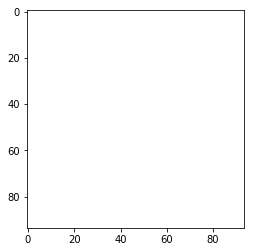

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


# def f(x, y):
#     return np.sin(x) + np.cos(y)

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(FC.shape[2]):
#     x += np.pi / 15.
#     y += np.pi / 20.
    im = plt.imshow(FC[:,:,i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)

#ani.save('dynamic_images.mp4')

plt.show()

In [ ]:
y.shape

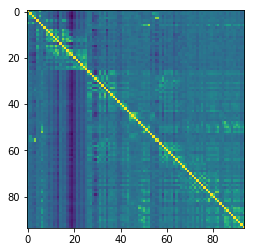

In [25]:
# hmpf = np.ones([4,4])
# hmpf[2][1] = 0
# imagelist = [ hmpf*i*255./19. for i in range(20) ]
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(FC[:,:,0])# cmap=plt.get_cmap('jet'), vmin=0, vmax=255)

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(FC[:,:,j])
    # return the artists set
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig)
plt.show()

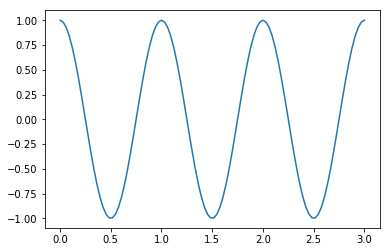

KeyboardInterrupt: 

In [33]:
%matplotlib inline

x = np.linspace(0, 3, 100)
k = 2*np.pi
w = 2*np.pi
dt = 0.1  

t = 0
for i in range(50):
    y = np.cos(k*x - w*t)
    if i == 0:
        line, = plt.plot(x, y)
    else:
        line.set_ydata(y)
    plt.pause(1) # pause avec duree en secondes
    t = t + dt
    
plt.show()


In [ ]:
plt.imshow(FC[:,:,0])

In [ ]:
n_chans1 = 0
n_chans2 = 5

plt.errorbar(step_list[:18], np.round(FC[n_chans1, n_chans2, :18],5),yerr=np.round(FC_error_bar[n_chans1, n_chans2,:18],5), color='blue')
plt.errorbar(step_list[18:], np.round(FC[n_chans1, n_chans2, 18:],5),yerr=np.round(FC_error_bar[n_chans1,n_chans2,18:],5), color='blue')

plt.ylim(bottom=0)

plt.axvline(x= 0, color='r',label='sample')
plt.axvline(x= 500, color='r', linestyle= '--',label='sample off')
plt.axvline(x= 2000, color='g',label='match')
plt.legend()
plt.show()

In [ ]:
step_list[:19]

In [ ]:
################ SAME but for one session and step by step

In [ ]:
file_name = '/home/rudy/Python2/regression_linear/result2/' + 'result_sess_no_'+sess_no+'channel_to_channel_all_interval_with_error_bar.csv'


df = pd.read_csv(file_name)

In [ ]:
df

In [ ]:
df.keys()

In [ ]:
print(np.unique(df['cortex1']))
print(np.unique(df['cortex2']))


print(np.unique(df['str_freq1']))
print(np.unique(df['str_freq2']))

print(np.unique(df['window_size1']))
print(np.unique(df['window_size2']))

print(np.unique(df['only_correct_trials']))

In [ ]:
# cortex1 = 'Visual'
# cortex2 = 'Prefontal'

In [ ]:
# select
# -800 sample + 500 + 600 ++ -600 match + 2000

only_correct_trials = True


lowcut1, highcut1, order1 = 7, 12, 3

lowcut2, highcut2, order2 = 7, 12, 3

window_size1 = 200
window_size2 = window_size1 #window_size1 ### 0.72
step = 100
delay = 0

str_freq1 = 'low'+str(lowcut1)+'high'+str(highcut1)+'order'+str(order1)
str_freq2 = 'low'+str(lowcut2)+'high'+str(highcut2)+'order'+str(order2)



In [ ]:
# df_cortex = df[(df['cortex1'] == cortex1) & (df['cortex2'] == cortex2) & (df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]
df_cortex = df[(df['str_freq1'] == str_freq1) & (df['str_freq2'] == str_freq2) & (df['window_size1'] == window_size1) & (df['window_size2']==window_size2)]

In [ ]:
df_cortex

In [ ]:
base_path = '/media/rudy/disk2/lucy/'
#sess_no ='150128'
rinfo_path = base_path +sess_no+'/session01/' + 'recording_info.mat'

In [ ]:
import collections

In [ ]:
#collections.Counter(io.get_area_cortex(rinfo_path, cortex1, unique = False))

In [ ]:
#areas = np.unique(df_cortex['area1'].values)


In [ ]:
df_cortex.keys()

In [ ]:
target_cortex1 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']
target_cortex2 = ['Visual', 'Prefontal', 'Parietal', 'Motor', 'Somatosensory']

target_areas1 = []
for cortex1 in target_cortex1 :
    for area in io.get_area_cortex(rinfo_path, cortex1, unique = False):
        target_areas1.append(area)
target_areas2 = []
for cortex2 in target_cortex2 :
    for area in io.get_area_cortex(rinfo_path, cortex2, unique = False):
        target_areas2.append(area)

target1 = collections.Counter(target_areas1)
target2 = collections.Counter(target_areas2)

label1 = []
for area1 in target1 :
    for count1 in range(target1[area1]):
        label1.append(area1)
        
label2 = []
for area2 in target2 :
    for count2 in range(target2[area2]):
        label2.append(area2)
        
print(label1)
print(label2)

print(len(label1))
print(len(label2))

FC = np.zeros( (len(label1), len(label2)))

i=0

for area1 in target1 :
    for count1 in range(target1[area1]):
        j=0
        for area2 in target2 :
            for count2 in range(target2[area2]):
                
                r = df_cortex[ (df_cortex['area1'] == area1) & (df_cortex['num1'] == count1) & (df_cortex['area2'] == area2) & (df_cortex['num2'] == count2)]['r2_test'].values
                if len(r) > 0 :
                    #print(i,j)
                    FC[i,j] = r[0]
    
                else :
                    print(area1, area2)
                    
                
                j+=1
        i+=1
                
                
        


In [ ]:
FC.shape

In [ ]:
# print('from ', cortex1, 'to ', cortex2)

threshold = df_cortex['r2_error_bar_test'].max()


print('from ', lowcut1,'-',highcut1, ' to ',  lowcut2,'-',highcut2, 'Hz')
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(FC, vmin=0)#, vmax=1.0)# cmap='jet')
fig.colorbar(im)


# We want to show all ticks...
ax.set_xticks(np.arange(len(label2)))
ax.set_yticks(np.arange(len(label1)))
# ... and label them with the respective list entries
ax.set_xticklabels(label2, linespacing=5)
ax.set_yticklabels(label1, linespacing=5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(label1)):
#     for j in range(len(label2)):

            
#         if round(FC[i, j],3) < 0.8* FC.max() :

#             text = ax.text(j, i, round(FC[i, j],1),
#                            ha="center", va="center", color="w")
#         else:
#             text = ax.text(j, i, round(FC[i, j],1),
#                            ha="center", va="center", color="b")
            

ax.set_title("R_squared")
#fig.tight_layout()

# directory = '/home/rudy/Python2/auto_encodeur_with_stimulus/figure/global/'+cortex1+'_to_'+cortex2+'/'
# if not os.path.exists(directory):
#     os.makedirs(directory)


# plt.savefig('/home/rudy/Python2/auto_encodeur_with_stimulus/figure/global/'+cortex1+'_to_'+cortex2+'/channel_to_channel_'+cortex1+'_to_'+cortex2+'_low'+str(lowcut1)+'high'+str(highcut1)+'align_on'+str(align_on1)+'from_time'+str(from_time1)+'to_time'+str(to_time1)+'.jpg')
plt.show()

In [ ]:
dico_area_to_cortex = io.get_dico_area_to_cortex()

In [ ]:
dico_area_to_cortex = io.get_dico_area_to_cortex()

label1_cortex = []
for area in label1 :
    label1_cortex.append(dico_area_to_cortex[area])
    
label2_cortex = []
for area in label2 :
    label2_cortex.append(dico_area_to_cortex[area])
    
label1_cortex = np.array(label1_cortex)
label2_cortex = np.array(label2_cortex)
label1 = np.array(label1)
label2 = np.array(label2)

In [ ]:
print('from ', lowcut1,'-',highcut1, ' to ',  lowcut2,'-',highcut2, 'Hz')
threshold = df_cortex['r2_error_bar_test'].max()
for cortex1 in ['Visual','Prefontal', 'Parietal', 'Motor', 'Somatosensory' ]:

    ind1 = (label1_cortex ==cortex1)
    for cortex2 in ['Visual','Prefontal', 'Parietal', 'Motor', 'Somatosensory' ]:
        print(cortex1, ' to ', cortex2)
        ind2 = (label2_cortex==cortex2)

        label1_bis = label1[ind1]
        label2_bis = label2[ind2]

        FC_cortex1_to_cortex2 = FC[ind1, :][:,ind2]


        fig, ax = plt.subplots(figsize=(15,15))
        #fig, ax = plt.subplots()
        im = ax.imshow(FC_cortex1_to_cortex2, vmin=0)#, vmax=1.0)# cmap='jet')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.10)
        fig.colorbar(im, cax=cax)


        # We want to show all ticks...
        ax.set_xticks(np.arange(len(label2_bis)))
        ax.set_yticks(np.arange(len(label1_bis)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(label2_bis)
        ax.set_yticklabels(label1_bis)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        #Loop over data dimensions and create text annotations.
        for i in range(len(label1_bis)):
            for j in range(len(label2_bis)):
                 if FC_cortex1_to_cortex2[i, j] > threshold :

                    if round(FC_cortex1_to_cortex2[i, j],3) < 0.8* FC_cortex1_to_cortex2.max() :

                        text = ax.text(j, i, round(FC_cortex1_to_cortex2[i, j],1),
                                       ha="center", va="center", color="w")
                    else:
                        text = ax.text(j, i, round(FC_cortex1_to_cortex2[i, j],1),
                                       ha="center", va="center", color="b")


        ax.set_title("R_squared")
        #fig.tight_layout()

        # directory = '/home/rudy/Python2/auto_encodeur_with_stimulus/figure/global/'+cortex1+'_to_'+cortex2+'/'
        # if not os.path.exists(directory):
        #     os.makedirs(directory)


        # plt.savefig('/home/rudy/Python2/auto_encodeur_with_stimulus/figure/global/'+cortex1+'_to_'+cortex2+'/channel_to_channel_'+cortex1+'_to_'+cortex2+'_low'+str(lowcut1)+'high'+str(highcut1)+'align_on'+str(align_on1)+'from_time'+str(from_time1)+'to_time'+str(to_time1)+'.jpg')
        plt.show()
    